# 왜 파이썬을 써야 하는가?

## 1. 강력한 다양한 도구들을, 간결한 코드로 빠르게 활용가능하다
- https://dart.fss.or.kr/dsac001/mainY.do

### Naver 금융 사이트 크롤링

In [2]:
code = '035420'
import pandas as pd
web = pd.read_html('http://finance.daum.net/item/main.daum?code='+code)
print(len(web))

4


In [10]:
df = web[3]
df.to_csv('./daum.csv',encoding='ms949')

### 대용량 text 관리하기

In [2]:
import pandas as pd
cf = pd.read_csv("./data/2016_4Q_cahs_flow.txt", sep='\t', thousands=',', encoding='cp949')
print(cf.head(2))

                재무제표종류      종목코드 회사명       시장구분   업종       업종명  결산월  \
0  현금흐름표, 간접법 - 별도재무제표  [060310]  3S  코스닥시장상장법인  262  전자부품 제조업    3   
1  현금흐름표, 간접법 - 별도재무제표  [060310]  3S  코스닥시장상장법인  262  전자부품 제조업    3   

        결산기준일  보고서종류   통화                                         항목코드  \
0  2016-03-31  사업보고서  KRW  ifrs_CashFlowsFromUsedInOperatingActivities   
1  2016-03-31  사업보고서  KRW       dart_ProfitLossForStatementOfCashFlows   

            항목명            당기  Unnamed: 13            전기           전전기  \
0      영업활동현금흐름  1.896017e+09          NaN  2.923614e+08  2.296141e+09   
1     당기순이익(손실) -3.620523e+09          NaN -5.538219e+09 -4.784630e+09   

   Unnamed: 16  
0          NaN  
1          NaN  


In [3]:
#drop the column
# cash_flow.drop(cash_flow.columns[-1] , axis=1, inplace=True)
# cash_flow.columns

Select the column to make a simple table

In [4]:
cf_p = cf[cf.columns[[1,2,7,11,12,14]]]
cf_p['Change'] = (cf_p.당기 - cf_p.전기)/cf_p.당기
cf_p = cf_p.fillna(0)
cf_p.head(5)

/home/markbaum/Python/Jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,종목코드,회사명,결산기준일,항목명,당기,전기,Change
0,[060310],3S,2016-03-31,영업활동현금흐름,1.896017e+09,2.923614e+08,0.845802
1,[060310],3S,2016-03-31,당기순이익(손실),-3.620523e+09,-5.538219e+09,-0.529674
2,[060310],3S,2016-03-31,당기순이익조정을 위한 가감,6.260199e+09,6.741938e+09,-0.076953
3,[060310],3S,2016-03-31,감가상각비,2.705374e+09,2.510785e+09,0.071927
4,[060310],3S,2016-03-31,대손상각비,2.016450e+07,1.057005e+08,-4.241908


In [5]:
cf_p = cf_p[cf_p.항목명 == cf_p.항목명[1]]

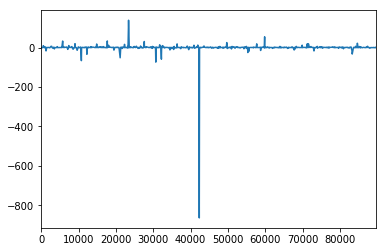

In [6]:
%matplotlib inline
cf_p.Change.plot(kind='line')

In [7]:
cf_p[cf_p.Change<-50]

,종목코드,회사명,결산기준일,항목명,당기,전기,Change
10703,[019010],그랜드백화점,2016-12-31,당기순이익(손실),4.606714e+08,3.107768e+10,-66.461695
21098,[001520],동양,2016-12-31,당기순이익(손실),1.205535e+10,6.371824e+11,-51.854755
30654,[006910],보성파워텍,2016-12-31,당기순이익(손실),8.252167e+06,6.174023e+08,-73.816987
32153,[003960],사조대림,2016-12-31,당기순이익(손실),7.854928e+08,4.709755e+10,-58.959247
42308,[036710],심텍홀딩스,2016-12-31,당기순이익(손실),1.477763e+08,1.277407e+11,-863.419836


In [8]:
cf_p[cf_p.Change>20]

,종목코드,회사명,결산기준일,항목명,당기,전기,Change
5689,[034120],SBS,2016-12-31,당기순이익(손실),-1.085801e+09,3.459227e+10,32.858766
17652,[012800],대창,2016-12-31,당기순이익(손실),1.531417e+09,-4.950013e+10,33.323079
23353,[214680],디알텍,2016-12-31,당기순이익(손실),-1.918673e+07,2.634946e+09,138.331731
27570,[096640],멜파스,2016-12-31,당기순이익(손실),1.341999e+09,-3.985032e+10,30.694733
49673,[035290],에이원앤,2016-12-31,당기순이익(손실),3.882068e+08,-9.396462e+09,25.204785
59828,[033110],이디,2016-12-31,당기순이익(손실),2.117420e+08,-1.130275e+10,54.379805
84682,[005860],한일사료,2016-12-31,당기순이익(손실),-5.923420e+07,1.231330e+09,21.787480


## 2. 더 복잡한 작업을 쉽게 작업하기

Naver Finance Infomations

In [9]:
code = '035420'
from intro import naver_finance_table
naver_finance_table(code)

,계정항목(연결),2016/03,2016/06,2016/09,2016/12,2013,2014,2015,2016
0,매출액(억원),9372,9872,10130,10849,23119,27584,32539,40226.00
1,영업이익(억원),2568,2726,2822,2902,5241,7581,8302,11020.00
2,당기순이익(억원),1650,2132,1980,1828,18952,4517,5169,7590.00
3,EPS(원),5018,6450,5902,5361,45425,13787,15737,22732.00
4,ROE(%),7.62,9.14,6.33,4.84,112.69,27.82,26.46,26.20
5,부채비율(%),89.45,87.06,41.81,54.27,82.86,88.85,93.25,54.27
6,주당배당금(원),-,-,-,1131,734,782,1100,1131.00


Darts Main Infos

In [11]:
from intro import dart_main_table
dart_all = dart_main_table('https://dart.fss.or.kr/dsac001/mainAll.do')
print(dart_all.head(6))

      시간    공시대상회사                          보고서명       제출인        접수일자
0  19:35   SGA임베디드             주요사항보고서(유상증자결정)     SGA임베디드  2017.07.04
1  18:11      옵트론텍           주요사항보고서(자기주식처분결정)        옵트론텍  2017.07.04
2  18:11    액토즈소프트           [기재정정]단일판매ㆍ공급계약체결      액토즈소프트  2017.07.04
3  18:05      티케이씨              타법인주식및출자증권취득결정        티케이씨  2017.07.04
4  17:56  유안타제1호스팩             [기재정정]증권신고서(합병)    유안타제1호스팩  2017.07.04
5  17:56        리젠  [기재정정]타법인주식및출자증권취득결정(자율공시)          리젠  2017.07.04


In [12]:
dart_kospi = dart_main_table('https://dart.fss.or.kr/dsac001/mainY.do')
print(dart_kospi.head(6))

      시간  공시대상회사                       보고서명     제출인        접수일자
0  17:55  보루네오가구                   최대주주변경    보루네오가구  2017.07.04
1  17:46    SKC         기업설명회(IR)개최(안내공시)       SKC  2017.07.04
2  17:39  쌍용양회공업  [기재정정]주요사항보고서(자기주식처분결정)    쌍용양회공업  2017.07.04
3  17:34    대신증권              투자설명서(일괄신고)      대신증권  2017.07.04
4  17:32    대신증권  일괄신고추가서류(파생결합증권-주가연계증권)      대신증권  2017.07.04
5  17:31    대신증권              투자설명서(일괄신고)      대신증권  2017.07.04


In [13]:
dart_kosdaq = dart_main_table('https://dart.fss.or.kr/dsac001/mainK.do')
print(dart_kosdaq.head(6))

      시간    공시대상회사                          보고서명       제출인        접수일자
0  18:11      옵트론텍           주요사항보고서(자기주식처분결정)        옵트론텍  2017.07.04
1  18:11    액토즈소프트           [기재정정]단일판매ㆍ공급계약체결      액토즈소프트  2017.07.04
2  17:56  유안타제1호스팩             [기재정정]증권신고서(합병)    유안타제1호스팩  2017.07.04
3  17:56        리젠  [기재정정]타법인주식및출자증권취득결정(자율공시)          리젠  2017.07.04
4  17:35      아이엠텍       [기재정정]분기보고서 (2017.03)        아이엠텍  2017.07.04
5  17:21      유지인트                  [기재정정]참고서류        유지인트  2017.07.04


In [14]:
dart = [dart_all, dart_kosdaq, dart_kospi]
dart_table = pd.concat(dart)
dart_table = dart_table.drop_duplicates(dart_table.columns, keep='first')

In [15]:
#set(dart_table.공시대상회사)

In [16]:
dart_table[dart_table.공시대상회사 == '삼성전자']

,시간,공시대상회사,보고서명,제출인,접수일자
81,10:45,삼성전자,장래사업ㆍ경영계획(공정공시),삼성전자,2017.07.04


    직관적이고 빠른 작업이 가능하다
    하지만 파이썬을 코딩하는 과정은 쉽지 않다. 
    역설적으로 어렵기 때문에 다양한 기능들을 구현할 수 있다.
    
    코딩은 기본적인 부분들만 익숙해 지고 나면,
    부가적 필요한 기능은 인터넷 검색등 손쉽게 바로 소스코드를 찾을 수 있다.
    (익숙해 질 수록 원하는 기능을 빠르게 찾게 된다)
    (정해진 반복적인 작업을 대신하는 역활로써는 강력한 기능들이 제공가능하다)

# 기초가 전체중 50%를 차지한다!!!

In [ ]:
# 파이썬 코딩의 기본 3요소
# Data,  함수,  연결기호

## Data
숫자, 문자

### 숫자 : integer , float
- 컴퓨터가 이해 및 처리 가능한 유일한 type

In [17]:
1 + 2

3

In [18]:
10 - 20

-10

In [19]:
3.14159252 - 0.0000000003

3.1415925197

In [20]:
3 / 4

0.75

In [21]:
30//4 # 몫

7

In [22]:
30%4  # 나머지

2

### 문자 : String
- 문자열은 3가지 연산만 가능 
    1. 문자 연결
    2. indexing/ slicing
    3. counting.... 끝!!!
- 32비트/ 64비트 : 32진수, 64진수 숫자로 문자를 치환해서 연산처리
- 박근혜 + 최순실 = '최태민' : 답을 알 수 없다
- 문재인 / 홍준표 = '바른정당'   : 답을 알 수 없다

In [23]:
'0'

# 문자 연결
"10" + '2'

'대한'+'2017'+'대한회계사회'+'gogo!!'

#  indexing : 특정 지점을 콕 집는다.
#'대한민국' - '민국'
gogo = '대한민국'
gogo[2] 

# slicing : 특정 범위를 지정
gogo[:2]  

'0'

# Data Quiz

    '2017년 대한민국' 에서 '2017' 를 숫자로 뽑아내라...

    start>>>
    text = '2017년 대한민국'  
    tips>>
    1. slicing 으로 '2017'문자를 추출
    2. '2017'문자를 숫자로 변환

In [39]:
text = '2017년 대한민국'

## Data
[ List ] , { dictionary : 설명 }

### [ List ]

In [40]:
lists = [1,2,3,4,5,'회계','재무']

lists[-1]

# List 내부 데이타 : 숫자, 문자
# List 내부 인덱스 : 0,1,2,3,4....... (무조건 순서대로 진행)
#  장점 : 만들기가 쉽다
#      : 인덱스 주소만 알면 검색과 활용이 쉽다.
#      : matrix 구조를 활용하면 대용량 데이터도 처리가 가능하다

#  단점 : 무조건 0부터 작업을 시작 (for 문을 활용시 주요한 특징)
#      : 1게 list가 100만개 데이터를 갖고 있으면, 이 리스트를 10번 검색하는 경우 무조건 100만번 + N 번의 작업이 필요 ()

# 자료가 3000만개일 때 3번 반복시 시간측정
import time; t0 = time.time()
[ print(i/10000000) for i in range(30000000) if i%10000000 == 0]
t1 = time.time() ; print(int(t1-t0),'sec')    

### {Dictionary : 설명}    

In [45]:
dictionary = {'005390':'삼성전자', '035420':'네이버'}

dictionary['005390']

dictionary['000660'] = 'SK하이닉스'

dictionary

In [49]:
# dictionary = { key값 : value }
# 장점 : 상대적으로 만들기가 쉽다
#     : 검색이 빠르다, Key값이 일치하면 바로 결과를 출력
#     : 1개 key 값에 value는 여러개도 가능 (value 값도  [list],{ dict} 모두 가능)

# 단점 : 순서가 없어서 정렬을 할 수 없다.
#     : key값의 오타로 비슷한 key 값들이 중복되어 존재할 가능성이 있다
#     : key값과 value를 모두 알아야만 자료를 찾을 수 있다.

정리

    <data>
    2017, 3.141592..
    '대한민국 대표 공인 회계사'
    codes
    [1, 2, 3, 4 ,'대한민국', 서울시]
    {'000660': 'SK하이닉스', '005390': '삼성전자', '035420': '네이버'}

    <data>
    숫자   :  유일하게 컴퓨터가 인식 연산 가능한 type
    '문자' :  문자의 counting,  문자열 더하기,  indexing/ slicing
    변수명  :  변수는 문자로만 가능 (내부는 임의의 값들로 수정 변환이 가능)
    [list형 데이터] - 숫자/ 문자
    {dict형 데이터} - { key값 : value값 } - 숫자 /문자

# Data Quiz

    lists = [2017, '년', '대한민국'] 의 자료를 활용해서
    '2017년대한민국' 1개의 문자열로 변환해 보시오.

    start>> lists = [2017, '년', '대한민국']
    tips>>
    1.lists[0] 의 인덱스를 활용해서 각각의 객체를 추출
    2. 문자와 문자 객체를 + 를 통해서 1개로 합친다

# Data Quiz

    dictionary = {'005390':'삼성전자', '035420':'네이버'} 자료를 통해서
    1. 030200 코드인 'KT'를 위 자료에 추가하라
    2. 005390 코드인 '삼성전자'를 화면에 출력하라

    start>> dictoinary
    tips>>
    1.딕셔너리 추가
    dictionary ['key문자열'] = 'value 문자열'

# Function

## 함수
반복문, 판단문

### 반복문 : for
list / dict 객체들을 순차적 반복 처리

In [51]:
lists

[1, 2, 3, 4, 5, '회계', '재무']

In [52]:
for out in lists:
    print(out)

1
2
3
4
5
회계
재무


In [53]:
dictionary

{'000660': 'SK하이닉스', '005390': '삼성전자', '035420': '네이버'}

In [54]:
# value 값 순서대로 key값이 출력
for out in dictionary:
    print(out)

000660
005390
035420


## 판단문 : if
개별 객체가 조건에 해당되는지를 판단

In [55]:
for out in lists:
    if type(out) == str:
        print(out)

회계
재무


In [56]:
for out in lists:
    if type(out) == int:
        print(out)

1
2
3
4
5


In [57]:
for out in dictionary:
    if out == '005390':
        print(out)

005390


## tuple
(객체명, 객체명) : 각각을 병렬적 객체로 인식

In [58]:
dictionary

{'000660': 'SK하이닉스', '005390': '삼성전자', '035420': '네이버'}

In [59]:
dictionary.items()

dict_items([('000660', 'SK하이닉스'), ('005390', '삼성전자'), ('035420', '네이버')])

In [60]:
for k, v in dictionary.items():
    if k == '005390':
        print(v)

삼성전자


# 연결기호

## '' , ""
이것은 문자열이다

"""   Hello this is web browser text book in jupyter notebook,
you can edit in web brower , so could be ues in server version """

. 종속

dictionary.items()

lists.append('apple')

lists

, 대등

lists

for k ,v  in dictionary.items():
    print('Code : ', k , '  name : ',v)

: 부분집합 (내부에 제한된 일부분)

for out in lists:
    print(out)

    '' , ""  문자열 지정 (연산 불가능한 객체)
    . 종속   
    , 병렬나열
    : 내부설계
    = 입력
    == 대등조건
    != 부 대등조건

# Function

    lists = [1, 2, 3, 4. 5] 
오류의 원인을 설명하시오

    for out in lists;
        print(out)
오류의 원인을 설명하시오

    code = '005390"
오류의 원인을 설명하시오

    <data>
    2017, 3.141592..
    '대한민국 대표 공인 회계사'
    codes
    tuple1, tuple2
    [1, 2, 3, 4 ,'대한민국', 서울시]
    {'000660': 'SK하이닉스', '005390': '삼성전자', '035420': '네이버'}

    <data>
    숫자   :  유일하게 컴퓨터가 인식 연산 가능한 type
    '문자' :  문자의 counting,  문자열 더하기,  indexing, slicing
    변수명  :  변수는 문자로만 가능 (내부는 임의의 값들로 수정 변환이 가능)
    tuple1, tuple2 : 여러 객체를 병렬적으로 처리 (2개 , 3개 , 여러개도 병렬처리 가능 : 꼭 짝은 맞아야 한다!!)
    ex) (tuple1, tuple2) : 컴퓨터가 연산처리 결과로 tuple을 출력시 () 소괄호로 표시
    [list형 데이터] - 숫자/ 문자
    {dict형 데이터} - { key값 : value값 } - 숫자 /문자`m